In [18]:
import statistics as st
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [19]:
def roll_die():
    return random.randint(1,6)


class Player:
    """
    Responsibilities:
    Keep track of score and number of rolls
    Determine if player should roll again based on current state
    Run through a complete turn
    - 
    """
    
    def __init__(self):
        self.points = 0
        self.reset()
    
    def reset(self):
        self.points = 0
        self.rolls = 0
    
    def should_roll_again(self):
        """
        Returns True if the Player should roll again, False otherwise
        This method should probably be overridden with subclasses to do more complex stuff!
        """
        return False
    
    def play_turn(self):
        self.reset()
        
        while True:
            roll = roll_die()
            self.rolls += 1
            if roll == 1:
                self.points += 0
                return 0
            else:
                self.points += roll
            if not self.should_roll_again():
                break
        
        return self.points

In [20]:
class PigSolitaireGame:
    def __init__(self, player):
        self.player = player
    
    def play_game(self):
        total_points = 0
        for _ in range(7):
            total_points += self.player.play_turn()
        
        return total_points

In [21]:
class BasePlayer(Player):
    # You only need to roll once
    def should_roll_again(self):
        if self.rolls < 2:
            return True
        else:
            return False

In [22]:
class AggressivePlayer(Player):
    #roll three times every round
    def should_roll_again(self):
        if self.rolls < 4:
            return True
        else:
            return False

In [23]:
class CautiousPlayer(Player):
    #roll two times every round
    def should_roll_again(self):
        if self.rolls < 3:
            return True
        else:
            return False

In [24]:
class NoHoldsBarredPlayer(Player):
    #roll twenty times per round
    def should_roll_again(self):
        if self.rolls < 21:
            return True
        else:
            return False

In [25]:
hanz = PigSolitaireGame(BasePlayer())
franz = PigSolitaireGame(AggressivePlayer())
yortuk = PigSolitaireGame(CautiousPlayer())
georg = PigSolitaireGame(NoHoldsBarredPlayer())

base_data = []
aggressive_data = []
cautious_data = []
no_holds_data = []

for x in range(10000):
    base_data.append(hanz.play_game())
    aggressive_data.append(franz.play_game())
    cautious_data.append(yortuk.play_game())
    no_holds_data.append(georg.play_game())

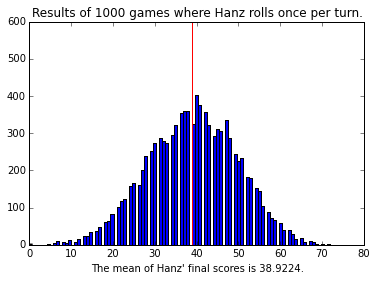

In [26]:
plt.hist(base_data, bins = 100)
plt.title("Results of 1000 games where Hanz rolls once per turn.")
plt.xlabel("The mean of Hanz' final scores is {}.".format(st.mean(base_data)))
plt.vlines(st.mean(base_data), ymin=0, ymax = 600, color='red', linestyle='solid')
plt.show()


In [27]:
print("The minimum score was {} and the maximum score was {}.".format(min(base_data), max(base_data)))

The minimum score was 0 and the maximum score was 72.


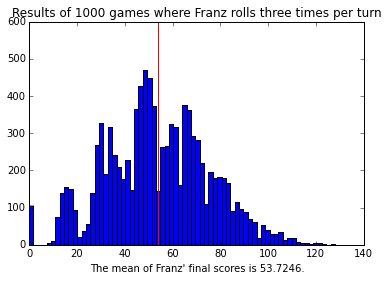

In [28]:
plt.hist(aggressive_data, bins = 70)
plt.title("Results of 1000 games where Franz rolls three times per turn")
plt.xlabel("The mean of Franz' final scores is {}.".format(st.mean(aggressive_data)))
plt.vlines(st.mean(aggressive_data), ymin = 0, ymax = 600, color ='red', linestyle='solid')
plt.show()

In [29]:
print("The minimum score was {} and the maximum score was {}.".format(min(aggressive_data), max(aggressive_data)))

The minimum score was 0 and the maximum score was 128.


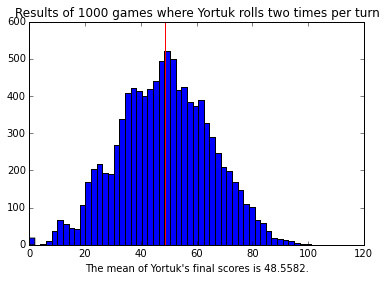

In [30]:
plt.hist(cautious_data, bins=50)
plt.title("Results of 1000 games where Yortuk rolls two times per turn")
plt.xlabel("The mean of Yortuk's final scores is {}.".format(st.mean(cautious_data)))
plt.vlines(st.mean(cautious_data), ymin = 0, ymax = 600, color ='red', linestyle='solid')
plt.show()

In [31]:
print("The minimum score was {} and the maximum score was {}.".format(min(cautious_data), max(cautious_data)))

The minimum score was 0 and the maximum score was 101.


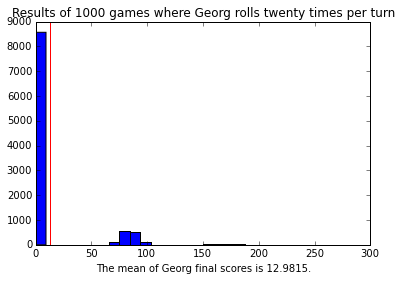

In [32]:
plt.hist(no_holds_data, bins=30)
plt.title("Results of 1000 games where Georg rolls twenty times per turn")
plt.xlabel("The mean of Georg final scores is {}.".format(st.mean(no_holds_data)))
plt.vlines(st.mean(no_holds_data), ymin = 0, ymax = 9000, color ='red', linestyle='solid')
plt.show()

In [33]:
print("The minimum score was {} and the maximum score was {}.".format(min(no_holds_data), max(no_holds_data)))

The minimum score was 0 and the maximum score was 282.


# Conclusion
When rolling too many times, the score is much lower, but of the players rolling 2-3 times, the mean scores were higher.